<a href="https://colab.research.google.com/github/yuseifer/03MIAR---Algoritmos-de-Optimizacion/blob/Trabajo-Practico/Trabajo_Pr%C3%A1ctico_Renzo_Fernandez_Chacon_Algoritmos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algoritmos de optimización - Trabajo Práctico<br>
Nombre y Apellidos: Renzo Daniel Fernández Chacón  <br>
Url: https://github.com/yuseifer/03MIAR---Algoritmos-de-Optimizacion/tree/Trabajo-Practico<br>
Google Colab: https://colab.research.google.com/drive/18p4dAbgEOF61InaiJbE_9aQJCB-mE8go?usp=sharing <br>
Problema:
>1. Sesiones de doblaje <br>
>2. Organizar los horarios de partidos de La Liga<br>
>3. Configuración de Tribunales

Descripción del problema:

Problema 2.

 Organizar los horarios de partidos de La Liga(I)

• Desde la La Liga de fútbol profesional se pretende organizar los horarios de los partidos de
liga de cada jornada. Se conocen algunos datos que nos deben llevar a diseñar un
algoritmo que realice la asignación de los partidos a los horarios de forma que maximice la
audiencia.
• Los horarios disponibles se conocen a priori y son los siguientes:






                                        

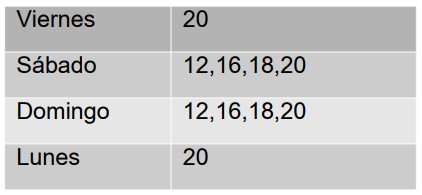



*   En primer lugar se clasifican los equipos en tres categorías según el numero de seguidores( que tiene relación directa con la audiencia). Hay 3 equipos en la
categoría A, 11 equipos de categoría B y 6 equipos de categoría C.
*   Se conoce estadísticamente la audiencia que genera cada partido según los equipos
que se enfrentan y en horario de sábado a las 20h (el mejor en todos los casos)






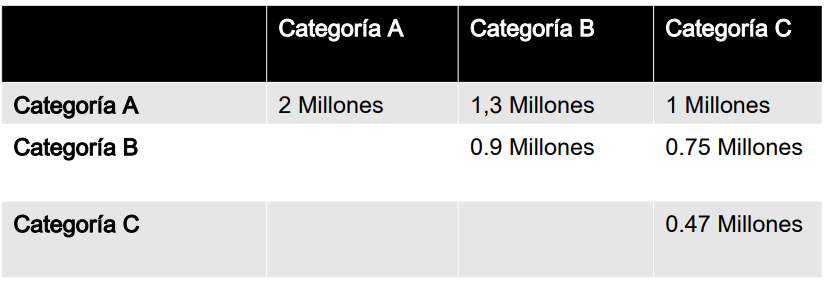



*   Si el horario del partido no se realiza a las 20 horas del sábado se sabe que se reduce
según los coeficientes de la siguiente tabla
*   Debemos asignar obligatoriamente siempre un partido el viernes y un partido el lunes.




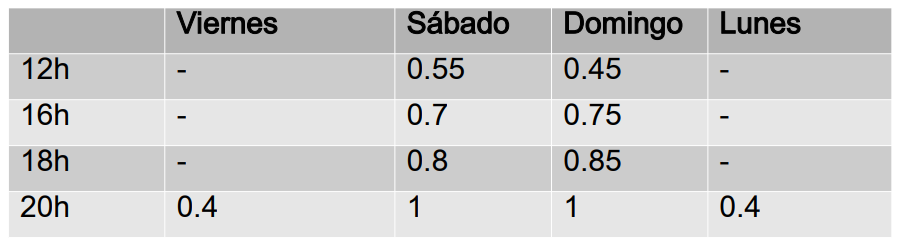



*   Es posible la coincidencia de horarios pero en este
caso la audiencia de cada partido se verá afectada y
se estima que se reduce en porcentaje según la
siguiente tabla dependiendo del número de
coincidencias:



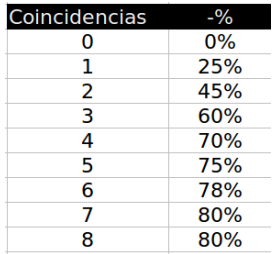

Los cálculos asociados a una jornada de ejemplo se realizan según se muestra en la
siguiente tabla:

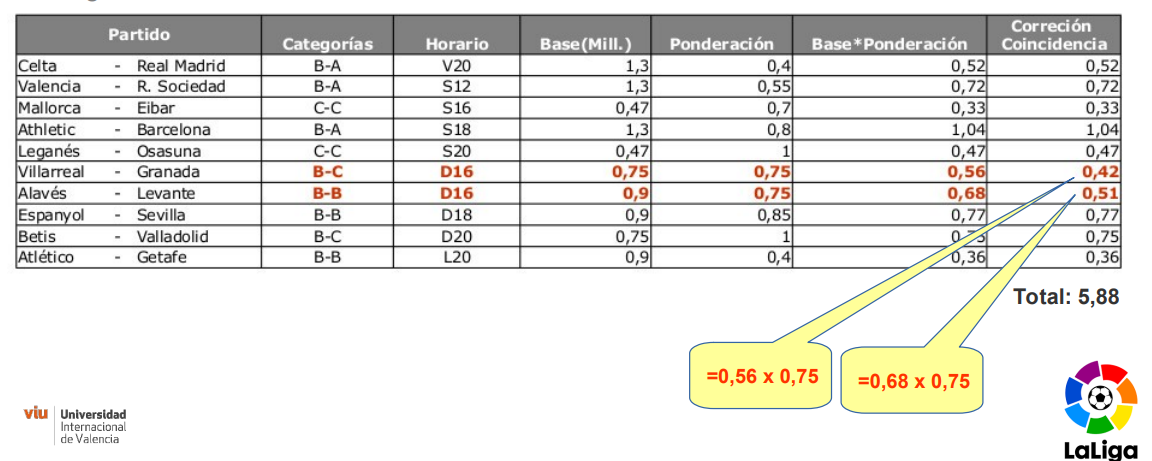

#Modelo
- ¿Como represento el espacio de soluciones?
- ¿Cual es la función objetivo?
- ¿Como implemento las restricciones?

Cada solución sera un vector de 10 posiciones, cada posición representará un partido programado. Cada partido tendrá la forma de representar con un vector de 3 posiciones [a,b,c] donde a y b serán los equipos a jugar y c será el horario programado. El horario puede tomar valores entre 0 y 9, donde el valor que tome según el horario queda represantado de la siguiente manera:

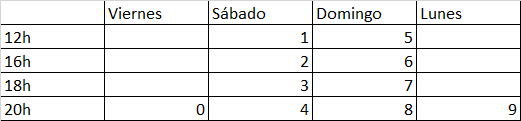

Para representar los equipos de cada categoría se representarán del 0 al 2, siendo 0 el equipo de categoría a, el 1 equipo b y el 2 equipo b.

La representación de las soluciones quedará representada de la manera que se muestra a continuación:

In [2]:
#Librerias a usar
import random

In [3]:
#Una solución deberá tener la forma:
solucion =[[1,1,1],[2,1,3],[2,1,3],[2,1,3],[2,1,3],
           [2,1,3],[2,1,3],[2,1,3],[2,1,3],[2,1,3]]

Con la función mostrada a continuación se puede crear una solución aleatoria:

In [4]:
#Creando una solución aleatoria
def crea_solucion_al():
  #Los 1 representan equipos de serie A
  #Los 2 representan equipos de serie B
  #Los 3 representan equipos de serie C
  #Lista de indices para equipos segun horarios desde
  #el viernes 20h hasta lunes 20h: [0,1,2,3,4,5,6,7,8,9]
  equipos_disponibles=[0,0,0,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2]
  solucion_al=[]
  for _ in range(10):
    partido=[]
    for i in range(3):
      if i <2:
        valor=random.choice(equipos_disponibles)
        partido.append(valor)
        equipos_disponibles.remove(valor)
      else:
        #Agregamos el sort en este punto para que las categorias tengan el formato:
        #0-0, 0-1, 0-2, 1-1,1-2,2-2
        #Con esto evitamos las categorias q son equivalentes como 1-2 y 2-1
        partido.sort()
        partido.append(random.randint(0,9))
    solucion_al.append(partido)
  return solucion_al





La función calcular valor será la función objetivo la cuál se deberá maximar para obtener la mejor combinación de partidos. En esta se usa los dos primeros elementos de cada partido pues estos representan la ponderación base de cada partido según que equipos se vayan a enfrentar.
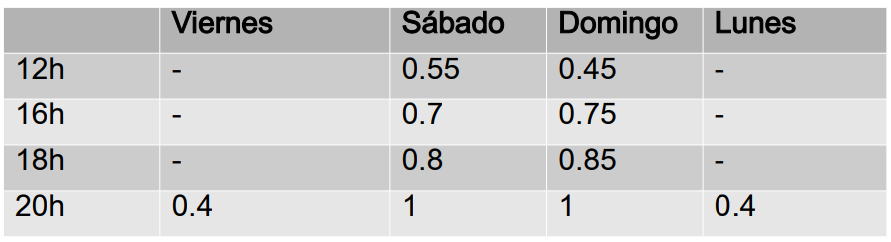

En el vector puntuaciones cada indice corresponde a un horario, tambien existe otro vector en el que va contabilizando cuantos partidos hay por horario. Posteriormente calcula la puntuación por horario de cada partido, posteriormente una vez contabilizadas las coincidencias, se realiza la penalización, luego se suman todos los valores del vector y ese resultado será la puntuación de esa solución. La tabla de las penalizanciones se muestra a continuación:


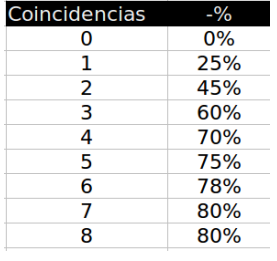

In [5]:
#Respuesta
#Funcion de costes
def calcula_valor(arr):
  #Diccionario con las ponderaciones base
  base={'[0, 0]':2,'[0, 1]':1.3,'[0, 2]':1,'[1, 1]':0.9,'[1, 2]':0.75,'[2, 2]':0.47}
  #formato vector coincidencia [0,1,2,3,4,5,6,7,8,9]
  coincidencia=[0,0,0,0,0,0,0,0,0,0]
  puntuaciones=[0,0,0,0,0,0,0,0,0,0]
  #pph: Ponderaciones por horario
  pph=[0.4,0.55,0.7,0.8,1,0.45,0.75,0.85,1,0.4]
  #Penalizaciones por coincidencia
  pc = [1,0.75,0.55,0.4,0.3,0.25,0.22,0.2,0.2]
  for partido in arr:
    #Los indices equivalen al horario, el horario 0 equivale al viernes a las 20h
    horario = partido[2]
    #Aquí accedemos a las coincidencia de cada horario, recordemos que horario
    #es un indice de una lista
    coincidencia[horario]+=1
    #Para acceder a la puntuación base usamos el diccionario y lo multiplicamos
    #por la ponderación por horario y se almacena en el vector puntuaciones
    puntuaciones[horario]+= base[str(partido[:-1])]*pph[horario]
  #multiplicamos por las penalizaciones
  equivalente = [a*pc[b-1] if b > 1 else a for a,b in zip(puntuaciones,coincidencia)]
  #equivalente=[a*b for a,b in zip(puntuaciones,pc)]
  #print(f'Repeticiones: {coincidencia}')
  #print(f'Puntuaciones: {puntuaciones}')
  #print(f'Puntuaciones con penaliaciones: {equivalente}')
  puntuacion_final=sum(equivalente)
  return puntuacion_final








Probamos el ejeplo del pdf para calcular su puntuación y que coincida con el del pdf:

In [6]:
ejemplo_pdf = [[0,1,0],[0,1,1],[2,2,2],[0,1,3],[2,2,4],[1,2,6],
               [1,1,6],[1,1,7],[1,2,8],[1,1,9]]
calcula_valor(ejemplo_pdf)

5.8771249999999995

Se crea una solución aleatoria para probar funciones y también se prueba la función de calcular valor

In [7]:
prueba =crea_solucion_al()
print(prueba)


[[1, 2, 1], [0, 1, 3], [1, 2, 2], [1, 2, 5], [1, 1, 4], [1, 2, 2], [0, 1, 0], [1, 2, 4], [1, 2, 3], [0, 1, 0]]


In [8]:
calcula_valor(prueba)

4.785

#Análisis
- ¿Que complejidad tiene el problema?. Orden de complejidad y Contabilizar el espacio de soluciones

Dentro del espacio de soluciones primero calculamos cuantas combinaciones vamos a tener por equipos, suponiendo que son 6 equipos y se pueden agrupar en grupos de 2 realizamos una combinación y nos da 21 posibles combinaciones, luego de las 21 combinaciones resultantes hacemos combinaciones de 10 para dar una solución dando 230230 soluciones disponibles.

Con este espacio de soluciones se pudo haber implementado un algoritmo de backtracking que nos podía dar una solución óptima global, pero se quería implementar un algoritmo genético para poder desarrollar con una técnica interesante y potente que en lo personal no la he implementado antes.

#Diseño
- ¿Que técnica utilizo? ¿Por qué?

Se procede a implementar un algoritmo genético pues por su facilidad de implementación y su potencia se puede obtener buenos resultados.

Para implementar el algoritmo primero se implementará una función que permita validar si una solución es válida. En este caso la única limitante de la solución valida será que se debe respetar que hay un límite de equipos de categoría por lo que habrá que eliminar aquellas soluciones que tengan por ejemplo 4 equipos de categoría A

In [9]:
#Validar una solución
def val_sol(arr):
  conteo=[0,0,0]
  for partido in arr:
    #Cada lista de partido contiene en sus dos primeros elementos la categoría de los equipos
    #Con eso podemos obtener si cumple los requisitos de que no existan
    #equipos de más en la solución
    conteo[partido[0]]+=1
    conteo[partido[1]]+=1
  if conteo[0]==3 and conteo[1]==11 and conteo[2]==6:
    return True
  else:
    return False

Ahora creamos una función para el cruce, el cruce de dos padres nos dará como resultado dos hijos

In [10]:
#Función para recombinación:
def recombinacion(arr,pivote):
  equipos_disponibles=[0,0,0,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2]
  n_arr=[]
  for i,partido in enumerate(arr):
    if i < pivote:
      equipos_disponibles.remove(partido[0])
      equipos_disponibles.remove(partido[1])
    else:
      elemento_1=random.choice(equipos_disponibles)
      equipos_disponibles.remove(elemento_1)
      elemento_2=random.choice(equipos_disponibles)
      equipos_disponibles.remove(elemento_2)
      prov=[elemento_1,elemento_2]
      prov.sort()

      arr[i][0]=prov[0]
      arr[i][1]=prov[1]

      #arr[i][0]=elemento_1
      #arr[i][1]=elemento_2


In [11]:
def cruce(arr1,arr2):
  pivote=len(arr1)//2
  hijo_1=arr1[:pivote]
  hijo_1+=arr2[pivote:]
  hijo_2 = arr1[pivote:]
  hijo_2+=arr2[:pivote]
  #En esta función vamos a implementar una recombinación, en caso de
  #que los hijos no sean válidos, se los hará validos cogiendo la primera mitad
  #de sus genes y remezclando el resto para hacerlos válidos, es decir, mutarlos
  #pero solo mezclaremos los equipos de categoría, no el día
  if not(val_sol(hijo_1)):
    recombinacion(hijo_1,pivote)
  if not(val_sol(hijo_2)):
    recombinacion(hijo_2,pivote)
  return [hijo_1,hijo_2]


In [12]:
#Función para mutación
def mutacion(arr):
  indice_1=random.randint(0,len(arr)-1)
  copia = arr.copy()
  val_n = random.randint(0,9)
  copia[indice_1][2] = random.randint(0,9)
  #Comprobamos que la mutación sea válida
  if (val_sol(copia)):
    arr[indice_1][2] = val_n



In [13]:
def algoritmo_genetico(iteraciones= 10):
  generacion = [crea_solucion_al() for _ in range(5)]
  maxi = 0
  best_solution=[]
  for _ in range(iteraciones):
    puntuaciones=[]
    puntuaciones = [calcula_valor(x) for x in generacion]
    #Validamos el máximo y que el máximo sea una solución válida
    if max(puntuaciones) > maxi and val_sol(generacion[puntuaciones.index(max(puntuaciones))]):
      maxi = max(puntuaciones)
      best_solution = generacion[puntuaciones.index(max(puntuaciones))]
    fitness = [x/sum(puntuaciones) for x in puntuaciones]
    #Buscamos el índice del primer máximo, y lo reemplazamos con 0 para seguir
    #buscando los otros máximos. Esto se hace para evitar alterar el tamaño de la
    #lista fitness
    mejor_1 = fitness.index(max(fitness))
    fitness[mejor_1]=0
    #Buscamos el índice del segundo máximo
    mejor_2 = fitness.index(max(fitness))
    fitness[mejor_2]=0
    #Buscamos el índice del tercer máximo
    mejor_3 = fitness.index(max(fitness))
    #Comenzamos el cruce y lo guardamos en la lista provisional nueva generacion
    n_gen=[]
    for indices in [mejor_2,mejor_3]:
    #creamos los hijos
      n_gen+= cruce(generacion[mejor_1],generacion[indices])
    #Añadimos la mejor solución al final de la nueva generación
    n_gen.append(best_solution)
    #Añadimos la probabilidad de mutación:
    if random.random() > 0.85:
      mutacion(n_gen[random.randint(0,4)])
    #Actualizamos la generación anterior con la nueva
    generacion = n_gen
  print(f'La mejor solución encontrada es: {best_solution} y su valor máximo es: {maxi}')
  return best_solution, maxi





In [15]:
mejor_solucion, maximo = algoritmo_genetico(iteraciones=100)
print(val_sol(mejor_solucion))

La mejor solución encontrada es: [[0, 2, 8], [1, 1, 5], [0, 1, 6], [1, 2, 2], [1, 1, 0], [1, 2, 1], [1, 2, 8], [0, 2, 8], [1, 1, 7], [1, 2, 2]] y su valor máximo es: 6.777
True


In [110]:
mejor_solucion, maximo = algoritmo_genetico(iteraciones=7000)
print(val_sol(mejor_solucion))

La mejor solución encontrada es: [[1, 1, 0], [1, 2, 2], [1, 1, 9], [0, 2, 1], [1, 2, 9], [1, 2, 4], [0, 1, 8], [0, 1, 4], [2, 2, 1], [1, 1, 4]] y su valor máximo es: 7.0927500000000006
True


In [16]:
mejor_solucion, maximo = algoritmo_genetico(iteraciones=7000)
print(val_sol(mejor_solucion))

La mejor solución encontrada es: [[0, 2, 8], [1, 2, 7], [1, 1, 7], [0, 2, 1], [1, 2, 7], [1, 1, 2], [1, 2, 3], [1, 1, 6], [0, 1, 0], [1, 2, 4]] y su valor máximo es: 7.01225
True


La mejor solución encontrada hasta el momento es de 7.09 puntos, normalmente el rango de soluciones oscila entre 6.50 a 7.05. El algoritmo comienza a fallar con iteraciones muy altas, adicionalmente cuando el algoritmo falla comienza a dar soluciones que no son válidas por lo que se propone volver a implementar la validación de la solución.

Se implementará una función para decodificar la solución y que sea entendible

In [1]:
#Función para ordenar la solución
#Creamos primero un array que solo tenga el horario

def ordena_solucion(arr):
  matriz_ordenada = sorted(arr, key=lambda x: x[2])
  return matriz_ordenada



In [17]:
print(prueba)
print(ordena_solucion(prueba))

[[1, 2, 1], [0, 1, 3], [1, 2, 2], [1, 2, 5], [1, 1, 4], [1, 2, 2], [0, 1, 0], [1, 2, 4], [1, 2, 3], [0, 1, 0]]
[[0, 1, 0], [0, 1, 0], [1, 2, 1], [1, 2, 2], [1, 2, 2], [0, 1, 3], [1, 2, 3], [1, 1, 4], [1, 2, 4], [1, 2, 5]]


In [20]:
from tabulate import tabulate
def representacion(msol,ma):
  solucion_ordenada=ordena_solucion(msol)
  cat_equipo={0:'A',1:'B',2:'C'}
  horarios = {0:'Viernes 20h',1:'Sábado 12h',2:'Sábado 16h',3:'Sábado 18h',4:'Sábado 20h',
              5:'Domingo 12h',6:'Domingo 16h',7:'Domingo 18h',8:'Domingo 20h',9:'Lunes 20h'}
  headers = ['Partido', 'Equipo 1', 'Equipo 2', 'Horario']
  p1,p2,p3,p4,p5,p6,p7,p8,p9,p10=['Partido 1'],['Partido 2'],['Partido 3'],['Partido 4'],['Partido 5'],['Partido 6'],['Partido 7'],['Partido 8'],['Partido 9'],['Partido 10']
  for i in range(len(solucion_ordenada)):
    solucion_ordenada[i][0]=cat_equipo[solucion_ordenada[i][0]]
    solucion_ordenada[i][1]=cat_equipo[solucion_ordenada[i][1]]
    solucion_ordenada[i][2]=horarios[solucion_ordenada[i][2]]
  p1+=solucion_ordenada[0]
  p2+=solucion_ordenada[1]
  p3+=solucion_ordenada[2]
  p4+=solucion_ordenada[3]
  p5+=solucion_ordenada[4]
  p6+=solucion_ordenada[5]
  p7+=solucion_ordenada[6]
  p8+=solucion_ordenada[7]
  p9+=solucion_ordenada[8]
  p10+=solucion_ordenada[9]
  my_data = [tuple(p1),tuple(p2),tuple(p3),tuple(p4),tuple(p5),tuple(p6),tuple(p7),tuple(p8),tuple(p9),tuple(p10)]
  print(tabulate(my_data,headers=headers))
  print(f'El valor máximo es: {ma}')






**Aquí se presenta la mejor solución hasta el momento**

In [21]:
representacion(mejor_solucion,maximo)

Partido     Equipo 1    Equipo 2    Horario
----------  ----------  ----------  -----------
Partido 1   A           B           Viernes 20h
Partido 2   A           C           Sábado 12h
Partido 3   B           B           Sábado 16h
Partido 4   B           C           Sábado 18h
Partido 5   B           C           Sábado 20h
Partido 6   B           B           Domingo 16h
Partido 7   B           C           Domingo 18h
Partido 8   B           B           Domingo 18h
Partido 9   B           C           Domingo 18h
Partido 10  A           C           Domingo 20h
El valor máximo es: 7.01225
